In [ ]:
###10748502

Top 1 node by degree:
('columbia', 1)
Network density: 1.0


/var/folders/m5/h2p0rblj3hl08svt7xvt760h0000gn/T/ipykernel_36369/2567305549.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Co-occurrence Weight')


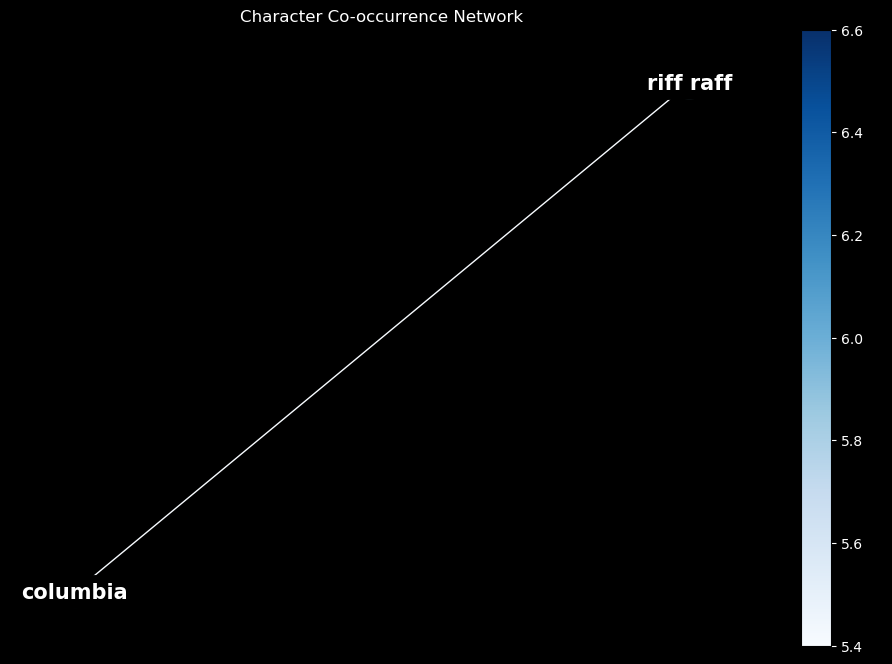

In [1]:
import networkx as nx ##Used to creat and calculate network and its characteristics
import matplotlib.pyplot as plt ##Used to draw graphics
from matplotlib.colors import Normalize ## It is used to normalize the data so that specific values can be mapped to colors later
from matplotlib.cm import ScalarMappable ##Used to map normalized data values to specific colors

##Create a network and add edges
G = nx.Graph()
G.add_edge('columbia', 'riff raff', weight=6)


##Calculate the degree of the node
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

##Orderer and output the node with the largest degree
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
print("Top 1 node by degree:")
for d in sorted_degree[:1]:
    print(d)

##Calculate network density
density = nx.density(G)
print("Network density:", density)

##Gets the weights of the edges and sets the layout
weights = [data['weight'] for _, _, data in G.edges(data=True)]
pos = nx.spring_layout(G, k=12, iterations=50)

##Normalize weights and set the color and width of edges
norm = Normalize(vmin=min(weights), vmax=max(weights))
edge_colors = [plt.cm.Blues(norm(weight)) for weight in weights]
edge_widths = [1 + 4 * norm(weight) for weight in weights]

##Draw a network
plt.figure(figsize=(12, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=15, font_color='white', font_weight='bold',
                        bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.3'))
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)

##Add a color bar and display the network
sm = ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='Co-occurrence Weight')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

plt.title('Character Co-occurrence Network', color='white')
plt.axis('off')
plt.show()
